# Importing Required Libraries for DeepLearning

In [39]:
# Importing the required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets , models, layers


# Inputing Data and Analysing the data in different perspective

In [40]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data() #loading the digit MNIST data

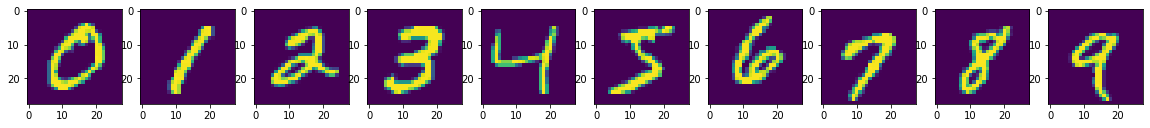

In [41]:
#plt.imshow(X_train[1])   # plotting one image of each class
indexes=[]
for i in range (10):
    j=0
    while i!=y_train[j]:
        j=j+1
    indexes.append(j)
        
plt.figure(figsize=(20,20))
for i in range (10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[indexes[i]] ) 
    


In [43]:
#[X_train Shape, y_train shape] : 
[X_train.shape, y_train.shape]

[(60000, 28, 28), (60000,)]

In [44]:
[X_test.shape, y_test.shape]

[(10000, 28, 28), (10000,)]

# Cleaning Data 

##### This is Fashion MNIST Data , so we just have to NORMALIZE the data as per our use:

In [45]:
X_train= X_train/255
X_test= X_test/255

# Modeling the Data

cnn: Convolutional Nueral Networks 

In [77]:
cnn =models.Sequential([
    layers.Conv2D(128, kernel_size=(3), padding ='same', activation ='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(64, kernel_size=(3), padding ='same', activation ='relu'),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax')
])

# Compiling the Data 

Before going for training , model needs more setting , of 
###### Optimizer ,
###### Loss, and 
###### Metrics


In [71]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the Data

In [72]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [73]:
history = cnn.fit(X_train, y_train, epochs =10, batch_size=16, validation_split=0.1, verbose =1)

Epoch 1/10
3375/3375 [==============================] - 22s 6ms/step - loss: 0.1552 - accuracy: 0.9519 - val_loss: 0.0427 - val_accuracy: 0.9870
Epoch 2/10
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.0326 - val_accuracy: 0.9923
Epoch 3/10
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0324 - val_accuracy: 0.9908
Epoch 4/10
3375/3375 [==============================] - 20s 6ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0328 - val_accuracy: 0.9923
Epoch 5/10
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0323 - val_accuracy: 0.9927
Epoch 6/10
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0331 - val_accuracy: 0.9920
Epoch 7/10
3375/3375 [==============================] - 21s 6ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0269 - val_ac

In [74]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (16, 28, 28, 128)         1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (16, 14, 14, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (16, 14, 14, 64)          73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (16, 7, 7, 64)            0         
_________________________________________________________________
flatten_6 (Flatten)          (16, 3136)                0         
_________________________________________________________________
dropout_3 (Dropout)          (16, 3136)                0         
_________________________________________________________________
dense_8 (Dense)              (16, 64)                 

# Evaluating the Data

In [75]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0275 - accuracy: 0.9917


[0.027482805773615837, 0.9916999936103821]

# Analysis of the model

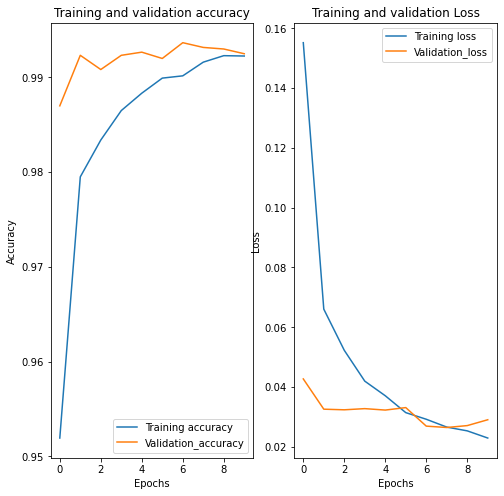

In [76]:
#plotting the training accuracy and validation accuracy with respect to epochs:
EPOCHS=10
plt.figure(figsize=(8,8))
epoch_range = range(EPOCHS)
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']
plt.subplot(1,2,1)
plt.plot(epoch_range,acc, label='Training accuracy' )
plt.plot(epoch_range, val_acc, label ='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.plot(epoch_range,loss, label='Training loss' )
plt.plot(epoch_range, val_loss, label ='Validation_loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()